In [1]:
import numpy as np
from qiskit import *

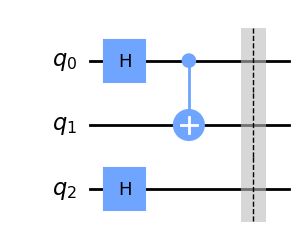

In [2]:
#enigme de la porte du trésor

# on créer un circuit de 3 Qbit, un par gardien plus le Qbit du mensonge
enig = QuantumCircuit(3) 

# on met une porte Hadamard sur le gardien 0 pour définir aléatoirement une porte
enig.h(0)
# et une autre porte Hadammard pour définir un menteur aléatoire
enig.h(2)

# on fait une porte CNOT du gardien 0 vers 1 pour qu'il partage l'information de qu'elle porte est la bonne
enig.cx(0,1)

enig.barrier()
enig.draw('mpl')

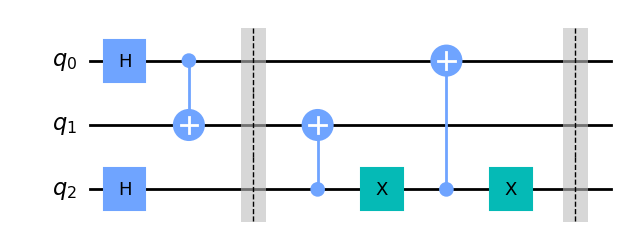

In [3]:
# on applique le circuit du mensonge

# on met une porte CNOT entre le mensonge et le gardien 1 comme ca si il est le menteur, on inverse sa réponse
enig.cx(2,1)

# on fait une porte NOT pour inverser le QBIT de mensonge, ainsi on modifie unique le gardien menteur
enig.x(2)

# on met une porte CNOT entre le mensonge et le gardien 0 qui ne s'activera que si elle ne la pas été avant et donc que le menteur est 0
enig.cx(2,0)

# enfin on inverse le Qbit du mensonge pour qu'il retrouve son état d'origine
enig.x(2)

enig.barrier()
enig.draw('mpl')

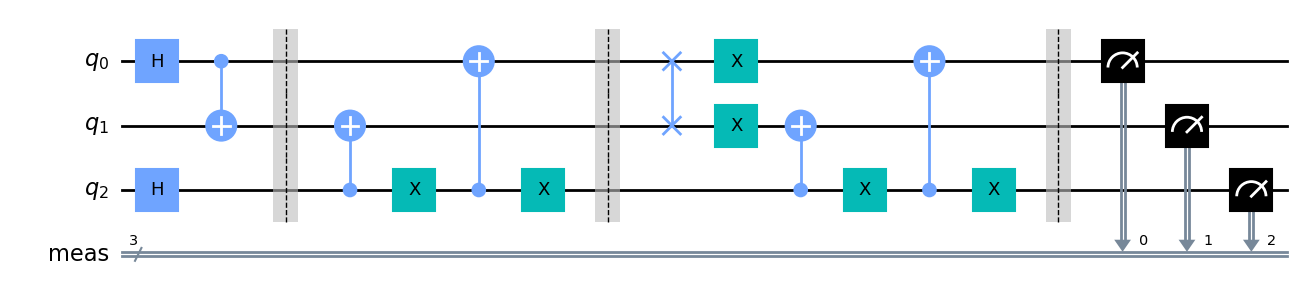

In [4]:
# partit de la question : Quel porte l'autre gardien me dirait de ne pas prendre

# porte swap pour que les deux gardien echange leur réponse car on les question sur l'autre gardien
enig.swap(0,1)

# on inverse chacun leur réponse pour appliquer l'application de "ne pas prendre"
enig.x(0)
enig.x(1)

# on réapplique le circuit du mensonge pour obtenir la vériter car un gardien ment
enig.cx(2,1)
enig.x(2)
enig.cx(2,0)
enig.x(2)

# on ajoute une prise de mesure sur chaque Qbit pour obtenir leur valeur à la fin de la question
enig.measure_all() 
enig.draw('mpl')